# Practice notebook for hypothesis tests using NHANES data

This notebook will give you the opportunity to perform some hypothesis tests with the NHANES data that are similar to
what was done in the week 3 case study notebook.

You can enter your code into the cells that say "enter your code here", and you can type responses to the questions into the cells that say "Type Markdown and Latex".

Note that most of the code that you will need to write below is very similar to code that appears in the case study notebook.  You will need to edit code from that notebook in small ways to adapt it to the prompts below.

To get started, we will use the same module imports and read the data in the same way as we did in the case study:

In [11]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np


## Question 1

Conduct a hypothesis test (at the 0.05 level) for the null hypothesis that the proportion of women who smoke is equal to the proportion of men who smoke.

In [12]:
pd.set_option('display.max_columns',15)
da = pd.read_csv("nhanes_2015_2016.csv")
print(da.shape)
print(da.head())

(5735, 28)
    SEQN  ALQ101  ALQ110  ALQ130  SMQ020  RIAGENDR  RIDAGEYR  ...  BMXHT  \
0  83732     1.0     NaN     1.0       1         1        62  ...  184.5   
1  83733     1.0     NaN     6.0       1         1        53  ...  171.4   
2  83734     1.0     NaN     NaN       1         1        78  ...  170.1   
3  83735     2.0     1.0     1.0       2         2        56  ...  160.9   
4  83736     2.0     1.0     1.0       2         2        42  ...  164.9   

   BMXBMI  BMXLEG  BMXARML  BMXARMC  BMXWAIST  HIQ210  
0    27.8    43.3     43.6     35.9     101.1     2.0  
1    30.8    38.0     40.0     33.2     107.9     NaN  
2    28.8    35.6     37.0     31.0     116.5     2.0  
3    42.4    38.5     37.7     38.3     110.1     2.0  
4    20.3    37.4     36.0     27.2      80.4     2.0  

[5 rows x 28 columns]


In [14]:
da["SMQ020x"] = da.SMQ020.replace({1: "Yes", 2: "No", 7: np.nan, 9: np.nan})  # np.nan represents a missing value
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

In [61]:
female= da.loc[da.RIAGENDRx == "Female"]
nf = len(female)
f_smokers = female.loc[female.SMQ020x == "Yes"]
nfs= len(f_smokers)
print("their are {} women in our set, {} who smokes with a proprotion = {} ".format(nf,nfs,nfs/nf))

their are 2976 women in our set, 906 who smokes with a proprotion = 0.30443548387096775 


In [62]:
male= da.loc[da.RIAGENDRx == "Male"]
nm = len(male)
m_smokers = male.loc[male.SMQ020x == "Yes"]
nms= len(m_smokers)
print("their are {} men in our set, {} who smokes with a proprotion = {} ".format(nm,nms,nms/nm))

their are 2759 men in our set, 1413 who smokes with a proprotion = 0.5121420804639362 


In [66]:
sm.stats.ztest(female.SMQ020x.dropna() == "Yes" , male.SMQ020x.dropna() == "Yes")

(-16.420585558984445, 1.362455350780943e-60)

__Q1a.__ Write 1-2 sentences explaining the substance of your findings to someone who does not know anything about statistical hypothesis tests.
    - their are almost 30% of women who smokes in our dataset and almost 50% of men who smokes 
    - based on our analysis their no statistical evidance that the two propotions are equal as almost half of men tend to smoke  

__Q1b.__ Construct three 95% confidence intervals: one for the proportion of women who smoke, one for the proportion of men who smoke, and one for the difference in the rates of smoking between women and men.

In [71]:
sm.stats.proportion_confint(len(f_smokers) , len(female))

(0.2879026244757051, 0.3209683432662304)

In [72]:
sm.stats.proportion_confint(len(m_smokers) , len(male))

(0.49349056386167417, 0.5307935970661982)

## Question 2

Partition the population into two groups based on whether a person has graduated college or not, using the educational attainment variable [DMDEDUC2](https://wwwn.cdc.gov/Nchs/Nhanes/2015-2016/DEMO_I.htm#DMDEDUC2).  Then conduct a test of the null hypothesis that the average heights (in centimeters) of the two groups are equal.  Next, convert the heights from centimeters to inches, and conduct a test of the null hypothesis that the average heights (in inches) of the two groups are equal.

**DMDEDUC2 values:**

- 4: Some college or AA degree
- 5: College graduate or above

In [86]:
dx=da[["DMDEDUC2","BMXHT"]]
graduate = dx.loc[dx.DMDEDUC2 == 5]
non_graduate=  dx.loc[dx.DMDEDUC2.isin([1,2,3,4,6,7,9,8])]

In [96]:
print(graduate.BMXHT.dropna().mean(),non_graduate.BMXHT.dropna().mean())

167.85535055350562 165.46395864106336


In [95]:
sm.stats.ztest(graduate.BMXHT.dropna(),non_graduate.BMXHT.dropna())

(7.578706943765076, 3.4901585776605263e-14)

In [99]:
sm.stats.CompareMeans(sm.stats.DescrStatsW(graduate.BMXHT.dropna()),sm.stats.DescrStatsW(non_graduate.BMXHT.dropna())).ztest_ind(usevar="unequal")

(7.758931901880965, 8.56476203963662e-15)

In [93]:
sm.stats.ttest_ind(graduate.BMXHT.dropna(),non_graduate.BMXHT.dropna(),usevar="unequal")

(7.758931901880965, 1.2530431393679344e-14, 2419.951773752108)

In [97]:
sm.stats.ztest(graduate.BMXHT.dropna()/2.54,non_graduate.BMXHT.dropna()/2.54)

(7.578706943764969, 3.4901585776634256e-14)

__Q2a.__ Based on the analysis performed here, are you confident that people who graduated from college have a different average height compared to people who did not graduate from college?
- yes their is a statistical significance that people graduated from collage have differant heights
 - our p-value < 0.05 this leads us to reject our null hypothesis 

## Question 3

Conduct a hypothesis test of the null hypothesis that the average BMI for men between 30 and 40 is equal to the average BMI for men between 50 and 60.  Then carry out this test again after log transforming the BMI values.

In [107]:
dy=da[["BMXBMI","RIAGENDRx","RIDAGEYR"]]
men_30_40 = dy.loc[(da.RIAGENDRx == "Male") & (da.RIDAGEYR.isin(range(30,41)))]
men_50_60 = dy.loc[(da.RIAGENDRx == "Male") & (da.RIDAGEYR.isin(range(50,61)))]

In [108]:
print(men_30_40.RIDAGEYR.dropna().mean(),men_50_60.RIDAGEYR.dropna().mean())

34.917004048582996 55.183838383838385


In [110]:
sm.stats.ttest_ind(men_30_40.RIDAGEYR.dropna(),men_50_60.RIDAGEYR.dropna(),usevar="unequal")

(-100.91641360571401, 0.0, 981.9934271215695)

In [113]:
sm.stats.ttest_ind(np.log(men_30_40.RIDAGEYR.dropna()),np.log(men_50_60.RIDAGEYR.dropna()),usevar="unequal")

(-96.81516506266411, 0.0, 869.3928366043708)

__Q3a.__ How would you characterize the evidence that mean BMI differs between these age bands, and how would you characterize the evidence that mean log BMI differs between these age bands?
 - based on our analysis their is a statistical evidance that the differance between two age groups is not zero as p-value is zero

## Question 4

Suppose we wish to compare the mean BMI between college graduates and people who have not graduated from college, focusing on women between the ages of 30 and 40.  First, consider the variance of BMI within each of these subpopulations using graphical techniques, and through the estimated subpopulation variances.  Then, calculate pooled and unpooled estimates of the standard error for the difference between the mean BMI in the two populations being compared.  Finally, test the null hypothesis that the two population means are equal, using each of the two different standard errors.

In [135]:
dz=da[["RIAGENDRx","BMXBMI","DMDEDUC2",'RIDAGEYR']]
f_graduate= dz.loc[(dz.RIAGENDRx == "Female") & (dz.RIDAGEYR.isin(range(30,41))) & (dz.DMDEDUC2 == 5)]
f_non_graduate= dz.loc[(dz.RIAGENDRx == "Female") & (dz.RIDAGEYR.isin(range(30,41))) & ~(dz.DMDEDUC2 == 5)]

In [136]:
print("The proportion of women BMI between age 30 & 40 who graduated is {} \nThe proportion of women BMI between age 30 & 40 who are not graduated is {} ".format(f_graduate.BMXBMI.mean(),f_non_graduate.BMXBMI.mean()))

The proportion of women BMI between age 30 & 40 who graduated is 27.808187134502933 
The proportion of women BMI between age 30 & 40 who are not graduated is 31.25734463276835 


In [151]:
df=f_graduate.append(f_non_graduate)
df["DMDEDUC2x"]=df.DMDEDUC2.replace({5:"Graduate",1:"Non_graduate",4:'Non_graduate',2:'Non_graduate',3:'Non_graduate',4:"Non_graduate",6:"Non_graduate",7:"Non_graduate",8:"Non_graduate",9:"Non_graduate"})


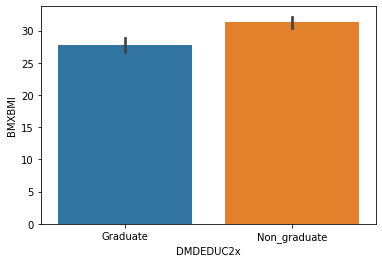

In [152]:
sns.barplot(data=df,x="DMDEDUC2x",y="BMXBMI")

In [160]:
sm.stats.ttest_ind(f_graduate.BMXBMI.dropna(),f_non_graduate.BMXBMI.dropna(),usevar="unequal")

(-4.833662355599106, 1.9620578582153497e-06, 373.1691835695286)

p-value < 0.05 
we will refuse the null hypothesis tha the differance between BMXBMI in women with age between 30,40 who graduated an who are not graduated is zero 

**As women who graduated tend to have smaller BMI than who are not **
